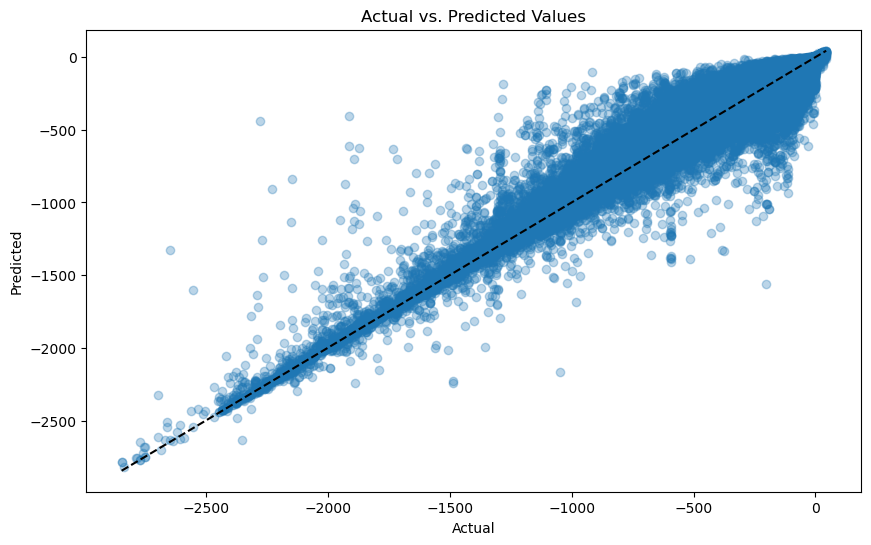

 MAE: 12.166569998819655, MSE: 769.0906255325741, R^2: 0.9780113634728603, OOB: 0.9765525601517826


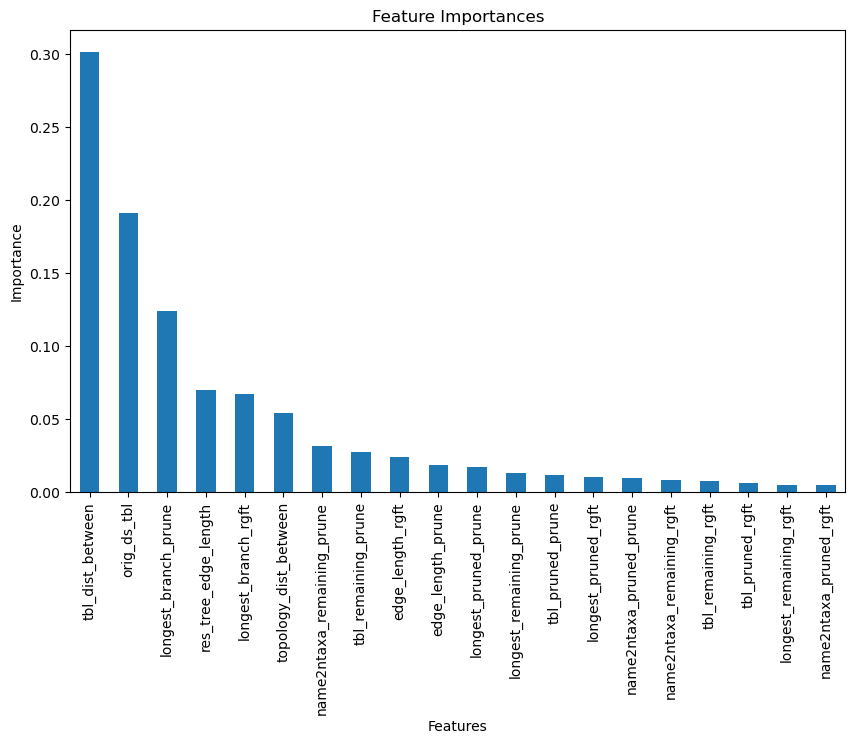

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

#COLS_TO_DROP = ['prune_name', 'rgft_name', 'orig_ds_ll', 'll_prune', 'time_prune',
#                'd_ll_prune', 'orig_ds_id', 'll_rgft', 'time_rgft', 'd_ll_merged',
#                'name2ntaxa_pruned_prune', 'name2ntaxa_remaining_prune',
#                'name2ntaxa_pruned_rgft', 'name2ntaxa_remaining_rgft']

COLS_TO_DROP = ['prune_name','rgft_name','orig_ds_ll','ll_prune','time_prune',
                'd_ll_prune', 'orig_ds_id','ll_rgft','time_rgft', 'd_ll_merged']

TARGET_COL = 'd_ll_merged'

file_path = './data/training_data/learning_all_moves.csv'
df = pd.read_csv(file_path, index_col='iteration', low_memory=False)

data = df.drop(COLS_TO_DROP, axis=1)

features = data.values
labels = df[TARGET_COL].values

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, labels, test_size=0.2, random_state=42)

# Create a random forest model
model = RandomForestRegressor(n_estimators=70, random_state=42, oob_score=True)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)
oob = model.oob_score_
# Plot Predictions vs. Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f' MAE: {mae}, MSE: {mse}, R^2: {r2}, OOB: {oob}')

# Feature importance
feature_importance = model.feature_importances_

feature_importances = pd.Series(feature_importance, index=data.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances_sorted.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

#print('Feature Importance:')
#for feature, importance in zip(data.columns, feature_importance):
#    print(f'{feature}: {importance}')

MAE: 183.33520264035474
MSE: 78485.21928582551
R^2: -0.9608994818199212


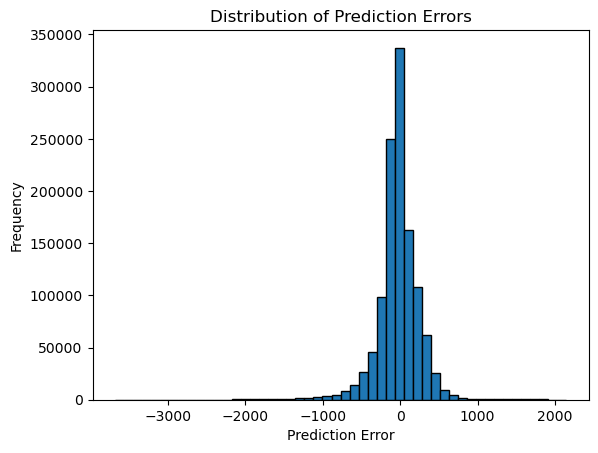

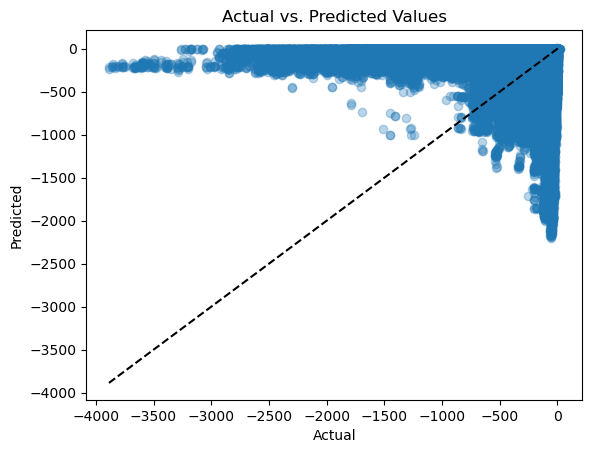

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
file_path = './data/validation_data/learning_all_moves.csv'
df = pd.read_csv(file_path, index_col='iteration', low_memory=False)

data = df.drop(COLS_TO_DROP, axis=1)

features = data.values
y_test = df[TARGET_COL].values

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Assuming `X_test` is your test features and `y_test` is the true labels

# Make predictions on the test set
y_pred = model.predict(features_scaled)

# Calculate the validation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Plot the distribution of errors
errors = y_test - y_pred
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

# Scatter plot to visualize actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

In [13]:
import pandas as pd

file_path = './data/validation_data/learning_all_moves.csv'
df_val = pd.read_csv(file_path, index_col='iteration')
small_df = df_val.loc[:, ['prune_name','rgft_name','orig_ds_ll', 'd_ll_merged']]
small_df


/var/folders/1s/5_jwsmtn2n54h333qvdtr32c0000gp/T/ipykernel_12939/392431310.py:4: DtypeWarning: Columns (5,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_val = pd.read_csv(file_path, index_col='iteration')


,prune_name,rgft_name,orig_ds_ll,d_ll_merged
iteration,,,,
"2,0",Sp005,Sp000,-2325.3792,-1.566033
"2,1",Sp005,N4,-2325.3792,-1.843787
"2,2",Sp005,N5,-2325.3792,-2.247767
"2,3",Sp005,N6,-2325.3792,-2.587224
"2,4",Sp005,Sp002,-2325.3792,-4.203525
...,...,...,...,...
"23,17",Sp009,N18,-20335.5210,-120.991460
"23,18",Sp009,Sp008,-20335.5210,-31.292253
"23,19",Sp009,Sp007,-20335.5210,-31.249247


In [14]:
small_df.sort_values(by=['d_ll_merged'], ascending=False)


,prune_name,rgft_name,orig_ds_ll,d_ll_merged
iteration,,,,
"34,30",N35,Sp036,-27277.950,21.475824
"34,31",N35,N32,-27277.950,21.346060
"34,23",N35,N24,-27277.950,20.081535
"38,44",N39,Sp001,-12123.774,13.387705
"38,34",N39,N35,-12123.774,12.585225
...,...,...,...,...
"73,0",N74,N1,-73728.780,-3850.160000
"77,1",Sp038,Sp011,-73728.780,-3863.883300
"77,0",Sp038,N1,-73728.780,-3863.900000


In [15]:
file_path = './data/validation_data/learning_all_moves.csv'
df = pd.read_csv(file_path)
# split the Name column into two columns
df[['iter_prune', 'iter_rgft']] = df['iteration'].str.split(',', expand=True)

# view the updated DataFrame
print(df)

/var/folders/1s/5_jwsmtn2n54h333qvdtr32c0000gp/T/ipykernel_12939/3711649444.py:2: DtypeWarning: Columns (5,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


        iteration prune_name rgft_name  orig_ds_ll    ll_prune time_prune  \
0             2,0      Sp005     Sp000  -2325.3792  -2326.9450      0.016   
1             2,1      Sp005        N4  -2325.3792  -2327.2230      0.009   
2             2,2      Sp005        N5  -2325.3792  -2327.6270      0.008   
3             2,3      Sp005        N6  -2325.3792  -2327.9663      0.008   
4             2,4      Sp005     Sp002  -2325.3792  -2329.5828      0.008   
...           ...        ...       ...         ...         ...        ...   
1176915     23,17      Sp009       N18 -20335.5210 -20456.5140      0.024   
1176916     23,18      Sp009     Sp008 -20335.5210 -20366.8140      0.022   
1176917     23,19      Sp009     Sp007 -20335.5210 -20366.7710      0.022   
1176918     23,20      Sp009     Sp000 -20335.5210 -20615.9840      0.024   
1176919     23,21      Sp009     Sp001 -20335.5210 -20615.9820      0.023   

         d_ll_prune  edge_length_prune  longest_branch_prune  \
0         -

In [16]:
df.groupby('iter_prune')['d_ll_merged'].nlargest(5)

iter_prune        
10          91955     1.798878
            91914     1.028712
            91910     0.057739
            243039   -0.015873
            435749   -0.026010
                        ...   
99          917929   -0.769108
            987077   -0.818202
            509891   -1.011181
            509890   -1.013933
            509883   -1.114281
Name: d_ll_merged, Length: 660, dtype: float64

In [17]:
from sklearn.preprocessing import MinMaxScaler 
import numpy as np 
  
# copy the data 
df_sklearn = df_val.copy() 
  
# apply normalization techniques 
column = 'd_ll_merged'
df_sklearn[column] = MinMaxScaler().fit_transform(np.array(df_sklearn[column]).reshape(-1,1)) 
  
# view normalized data   
display(df_sklearn) 

,prune_name,rgft_name,orig_ds_ll,ll_prune,time_prune,d_ll_prune,edge_length_prune,longest_branch_prune,tbl_pruned_prune,tbl_remaining_prune,...,tbl_pruned_rgft,tbl_remaining_rgft,name2ntaxa_pruned_rgft,name2ntaxa_remaining_rgft,longest_pruned_rgft,longest_remaining_rgft,topology_dist_between,tbl_dist_between,res_tree_edge_length,d_ll_merged
iteration,,,,,,,,,,,,,,,,,,,,,
"2,0",Sp005,Sp000,-2325.3792,-2326.9450,0.016,-1.566033,0.000015,4.51833,0.000015,6.479784,...,4.677239,1.802545,1.0,5.0,4.677239,0.657599,3.0,4.518345,0.000015,0.994103
"2,1",Sp005,N4,-2325.3792,-2327.2230,0.009,-1.843787,0.000015,4.51833,0.000015,6.479784,...,5.737675,0.742109,2.0,4.0,0.657599,0.657599,3.0,0.158924,0.000015,0.994032
"2,2",Sp005,N5,-2325.3792,-2327.6270,0.008,-2.247767,0.000015,4.51833,0.000015,6.479784,...,6.104610,0.375174,4.0,2.0,0.347175,0.222378,4.0,0.213244,0.000015,0.993929
"2,3",Sp005,N6,-2325.3792,-2327.9663,0.008,-2.587224,0.000015,4.51833,0.000015,6.479784,...,6.479784,0.000000,5.0,1.0,0.657599,0.000000,4.0,0.382633,0.000015,0.993842
"2,4",Sp005,Sp002,-2325.3792,-2329.5828,0.008,-4.203525,0.000015,4.51833,0.000015,6.479784,...,0.347175,6.132609,1.0,5.0,0.347175,4.677239,5.0,0.560419,0.000015,0.993428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"23,17",Sp009,N18,-20335.5210,-20456.5140,0.024,-120.991460,0.517362,1.43991,0.517362,9.851470,...,9.851470,0.000000,11.0,1.0,0.366412,0.000000,5.0,2.304692,0.517362,0.963541
"23,18",Sp009,Sp008,-20335.5210,-20366.8140,0.022,-31.292253,0.517362,1.43991,0.517362,9.851470,...,0.193263,9.658207,1.0,11.0,0.193263,1.439910,4.0,0.866688,0.517362,0.986496
"23,19",Sp009,Sp007,-20335.5210,-20366.7710,0.022,-31.249247,0.517362,1.43991,0.517362,9.851470,...,0.805113,9.046357,1.0,11.0,0.805113,1.439910,3.0,1.166412,0.517362,0.986507
